<a href="https://colab.research.google.com/github/shaikkhasim/Stock-prediction-Regression/blob/master/HW_Week_2_Stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importing libraries

import numpy as np

import pandas as pd
pd.set_option('display.max_columns',100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

#Import Regularized Regression algos
from sklearn.linear_model import Lasso, Ridge, ElasticNet

#Import Tree Ensemble algos
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



In [0]:
#Import data from yahoo
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010,9,1)
end = datetime.datetime(2019, 9, 1)

dataframe = web.DataReader("KO", "yahoo", start, end).reset_index()
dataframe.to_csv('KO.csv',index=False)



In [0]:
df=pd.read_csv('KO.csv')
df.set_index('Date',inplace=True)
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-09-01,28.660000,28.135,28.190001,28.655001,24166000.0,20.515377
2010-09-02,28.709999,28.430,28.709999,28.690001,14701200.0,20.540436


In [0]:
window_size = 32 # Using 32 consecutive days to predict 33rd day data.

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)



In [0]:
print(num_samples)
print(len(df))
print(window_size)
print(indices[0:5])
print(indices[-1])
print(indices.shape)

2233
2265
32
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
  25 26 27 28 29 30 31 32 33]
 [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
  26 27 28 29 30 31 32 33 34]
 [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
  27 28 29 30 31 32 33 34 35]
 [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
  28 29 30 31 32 33 34 35 36]]
[2232 2233 2234 2235 2236 2237 2238 2239 2240 2241 2242 2243 2244 2245
 2246 2247 2248 2249 2250 2251 2252 2253 2254 2255 2256 2257 2258 2259
 2260 2261 2262 2263 2264]
(2233, 33)


In [0]:
df_adj_close=df['Adj Close'].values[indices]
print(df_adj_close)
print(indices)
print(df_adj_close.shape)

[[20.51537704 20.54043579 20.60486984 ... 21.77352524 21.78442383
  21.80623436]
 [20.54043579 20.60486984 20.6299324  ... 21.78442383 21.80623436
  21.92980385]
 [20.60486984 20.6299324  20.70151901 ... 21.80623436 21.92980385
  22.22418785]
 ...
 [52.13000107 52.13999939 52.18000031 ... 54.54000092 54.72000122
  55.11000061]
 [52.13999939 52.18000031 52.02999878 ... 54.72000122 55.11000061
  55.04999924]
 [52.18000031 52.02999878 51.38999939 ... 55.11000061 55.04999924
  55.04000092]]
[[   0    1    2 ...   30   31   32]
 [   1    2    3 ...   31   32   33]
 [   2    3    4 ...   32   33   34]
 ...
 [2230 2231 2232 ... 2260 2261 2262]
 [2231 2232 2233 ... 2261 2262 2263]
 [2232 2233 2234 ... 2262 2263 2264]]
(2233, 33)


In [0]:
#create seperate object for target variable
y= df_adj_close[:,-1]
#print(y)
# Create separate object for input features
X = df_adj_close[:,:-1]
#len(X)

In [0]:
# Split X and y into train and test sets

split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]


## 10 fold cross validation process

In [0]:

# Function for creating model pipelines

from sklearn.pipeline import make_pipeline

#For standardization
from sklearn.preprocessing import StandardScaler


In [0]:
# Pipeline with Standardization and Lasso Regression
make_pipeline(StandardScaler(),Lasso(random_state=123))

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [0]:
# Create pipelines dictionary
pipelines ={'lasso':make_pipeline(StandardScaler(),Lasso(random_state=123)),
            'ridge':make_pipeline(StandardScaler(), Ridge(random_state=123)),
            'enet':make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
            }

In [0]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(),
                                RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),
                                GradientBoostingRegressor(random_state=123))

In [0]:
print( pipelines['rf'] )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)


In [0]:
print( type( pipelines['rf'] ) )

<class 'sklearn.pipeline.Pipeline'>


In [0]:
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


#Tuning Hyperparameters


In [0]:
# List tuneable hyperparameters of our Lasso pipeline, 'lasso_'
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=123,
       selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=123,
         selection='cyclic', tol=0.0001, warm_sta

In [0]:
# Lasso hyperparameters grid
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters, l1_ratio=1=Lasso,  l1_ratio=0=Ridge
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}

In [0]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [0]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [0]:
# Check Hyper parameters

for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [0]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

In [0]:
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], 
                     hyperparameters['lasso'], cv=10, n_jobs=-1)

model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=123,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,

In [0]:
# Create empty dictionary called fitted_models
fitted_models={}

# Loop through model pipelines, tuning each one and saving it to fitted_models

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


lasso has been fitted.
ridge has been fitted.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


enet has been fitted.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


rf has been fitted.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


gb has been fitted.


#Model Selection

In [0]:
# Model with the  high R^2 score
for name, model in fitted_models.items():
    print( name, model.best_score_ )


lasso 0.9109441830889479
ridge 0.9092555738323509
enet 0.9093257933305158
rf 0.4141407867916757
gb 0.3983280519768175


#Testing

In [0]:
# Predict test set using fitted random forest
pred_lasso= fitted_models['lasso'].predict(X_test)
pred_ridge= fitted_models['ridge'].predict(X_test)
pred_enet= fitted_models['enet'].predict(X_test)
pred_rf=fitted_models['rf'].predict(X_test)
pred_gb=fitted_models['gb'].predict(X_test)

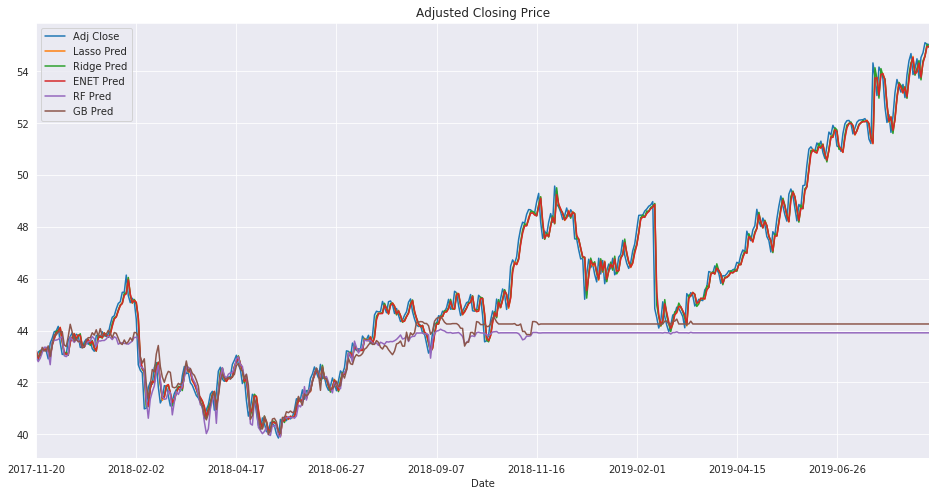

In [0]:
#Plot
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] 
# Add in all of our methods
df_test['Lasso Pred'] = pred_lasso
df_test['Ridge Pred'] =pred_ridge
df_test['ENET Pred']  =pred_enet
df_test['RF Pred']   =pred_rf
df_test['GB Pred']  =pred_gb
# Plot the data now
df_test.plot(figsize=(16,8), title='Adjusted Closing Price', grid=True)
plt.show()

In [0]:
# Calculate and print R^2 and MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


print( 'R^2:', r2_score(y_test, pred_lasso))
print( 'MAE:', mean_absolute_error(y_test, pred_lasso))

R^2: 0.9818612021043023
MAE: 0.33514912776900463


In [0]:
for name, model in fitted_models.items():
  pred=model.predict(X_test)
  print(name)
  print( 'R^2:', r2_score(y_test, pred ))
  print( 'MAE:', mean_absolute_error(y_test, pred))
  print('')
  

lasso
R^2: 0.9818612021043023
MAE: 0.33514912776900463

ridge
R^2: 0.9819901051325132
MAE: 0.332883074422384

enet
R^2: 0.981437231156209
MAE: 0.34220883749441355

rf
R^2: -0.15707750860988878
MAE: 2.5482771065676215

gb
R^2: -0.0422525645814793
MAE: 2.384249590177492



#Plot the model with High R^2 score and Low MAE

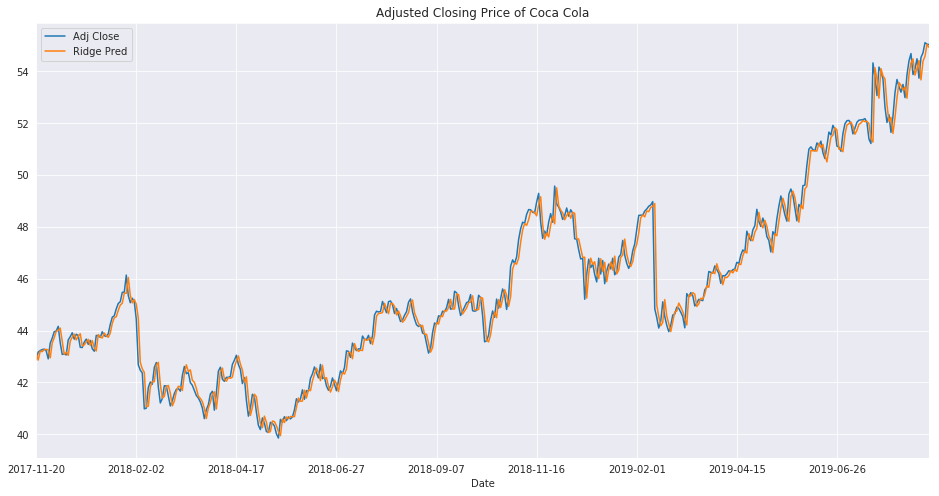

In [0]:
#Ridge has highest R^2 score and Lowest MAE
df_test_ridge = df.copy()
df_test_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test_ridge = df_test_ridge.iloc[ind_split+window_size:] # Past 32 days we don't know yet

# Adding Ridge predictions
df_test_ridge['Ridge Pred'] =pred_ridge

# Plot the data now
df_test_ridge.plot(figsize=(16,8), title='Adjusted Closing Price of Coca Cola', grid=True)
plt.show()

From the results we can see that, Out of five models Ridge has performed better.